Alexandre Rodrigues de Matos
Mat: 2025200193

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Substitua pelo caminho exato do seu arquivo
file_path = "c:/Users/Alexandre Matos/OneDrive/Documentos/Residência TJGO/Matérias/Gestão de Dados/Atividade aula 02/data/bronze/pessoas_teste_200.csv"
df = pd.read_csv(file_path, sep=';')

In [2]:
# === 2. Completude ===
completude = {
    "Nome faltando": df["nome_completo"].isna().sum(),
    "Data nasc. faltando": df["data_nasc"].isna().sum(),
    "Salário faltando": df["sallary"].isna().sum()
}

In [3]:
# === 3. Unicidade (duplicados no id) ===
unicidade = {
    "Total IDs": df["id_pessoa"].count(),
    "IDs únicos": df["id_pessoa"].nunique(),
    "Duplicados": df["id_pessoa"].count() - df["id_pessoa"].nunique()
}

# === 4. Consistência (tipos corretos) ===
def is_valid_date(d):
    try:
        if "/" in str(d):
            datetime.strptime(str(d), "%d/%m/%Y")
        else:
            datetime.strptime(str(d), "%Y-%m-%d")
        return True
    except:
        return False

df["data_valida"] = df["data_nasc"].apply(is_valid_date)

def is_valid_salary(s):
    try:
        float(str(s).replace(",", "."))
        return True
    except:
        return False

df["salario_valido"] = df["sallary"].apply(is_valid_salary)

consistencia = {
    "Datas inválidas": (~df["data_valida"]).sum(),
    "Salários inválidos": (~df["salario_valido"]).sum()
}

# === 5. Temporalidade ===
def parse_date(d):
    try:
        if "/" in str(d):
            return datetime.strptime(str(d), "%d/%m/%Y")
        else:
            return datetime.strptime(str(d), "%Y-%m-%d")
    except:
        return None

df["data_convertida"] = df["data_nasc"].apply(parse_date)

temporalidade = {
    "Datas futuras": (df["data_convertida"] > datetime.today()).sum(),
    "Datas muito antigas": (df["data_convertida"] < datetime(1900,1,1)).sum()
}

# === 6. Validade (salário > 0) ===
df["salario_num"] = df["sallary"].apply(lambda x: float(str(x).replace(",", ".")) if is_valid_salary(x) else None)
validade = {
    "Salário <= 0": (df["salario_num"] <= 0).sum()
}

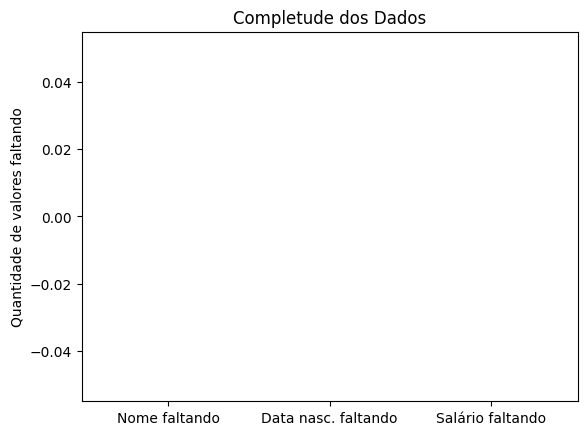

In [4]:
# Gráfico 1 - Completude
plt.bar(completude.keys(), completude.values())
plt.title("Completude dos Dados")
plt.ylabel("Quantidade de valores faltando")
plt.show()
#Mostrando que nao tem nenhum dado faltando

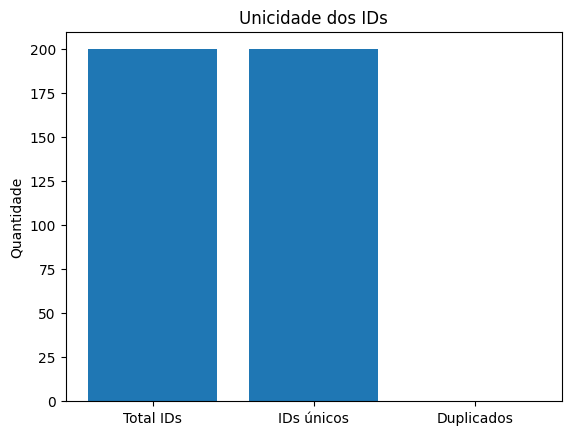

In [5]:
plt.bar(unicidade.keys(), unicidade.values())
plt.title("Unicidade dos IDs")
plt.ylabel("Quantidade")
plt.show()

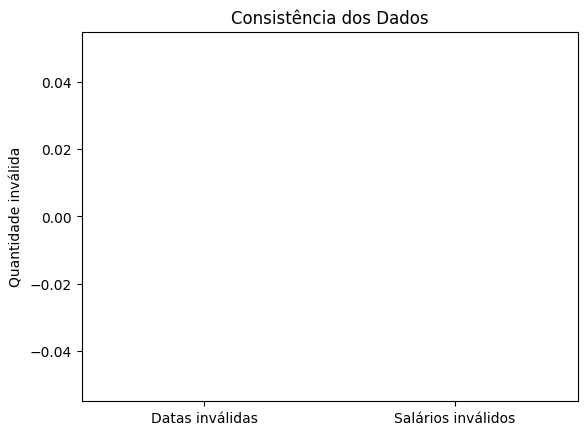

In [6]:
plt.bar(consistencia.keys(), consistencia.values())
plt.title("Consistência dos Dados")
plt.ylabel("Quantidade inválida")
plt.show()
#Mostrando que nao tem nenhum dado errado

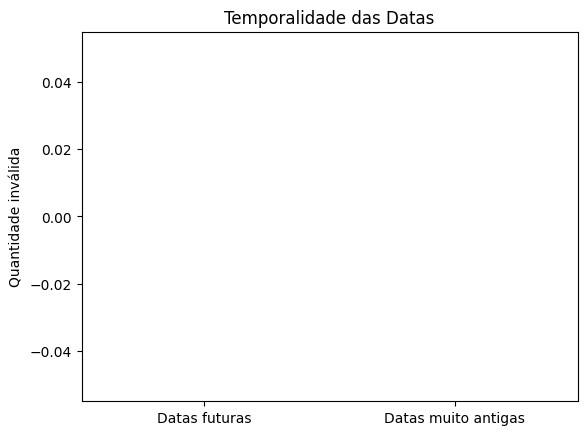

In [7]:
plt.bar(temporalidade.keys(), temporalidade.values())
plt.title("Temporalidade das Datas")
plt.ylabel("Quantidade inválida")
plt.show()
#Mostrando que nao tem nenhum dado errado

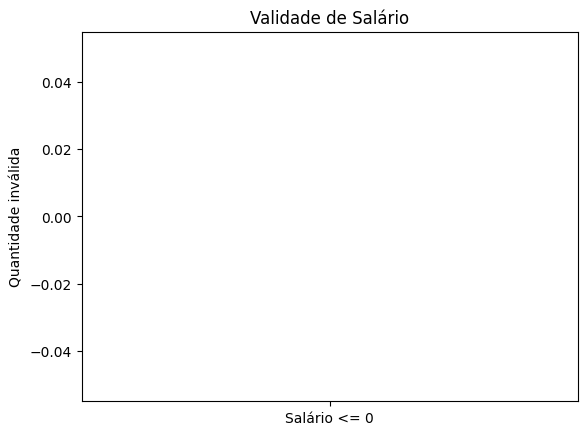

In [8]:
plt.bar(validade.keys(), validade.values())
plt.title("Validade de Salário")
plt.ylabel("Quantidade inválida")
plt.show()
#Mostrando que nao tem nenhum dado errado